In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
cancer_data = pd.read_csv('https://drive.google.com/uc?export=download&id=1ZfbBgw6MgoQLsGQNFTzSxURQWU7YY5qi')

In [3]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [6]:
cancer_data.shape

(569, 33)

In [7]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [9]:
cancer_data = cancer_data.drop(columns=['id', 'Unnamed: 32'], axis=1)

In [11]:
cancer_data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cancer_data['diagnosis'] = le.fit_transform(cancer_data['diagnosis'])

In [15]:
X = cancer_data.drop(columns='diagnosis', axis=1)
Y = cancer_data['diagnosis']

print("\nData setelah Prepocessing\n")
print(cancer_data.head())


Data setelah Prepocessing

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419 

/tmp/ipython-input-3449066200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data = cancer_data, palette='Set2', ax=axes[i])
/tmp/ipython-input-3449066200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data = cancer_data, palette='Set2', ax=axes[i])
/tmp/ipython-input-3449066200.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data = cancer_data, palette='Set2', ax=axes[i])


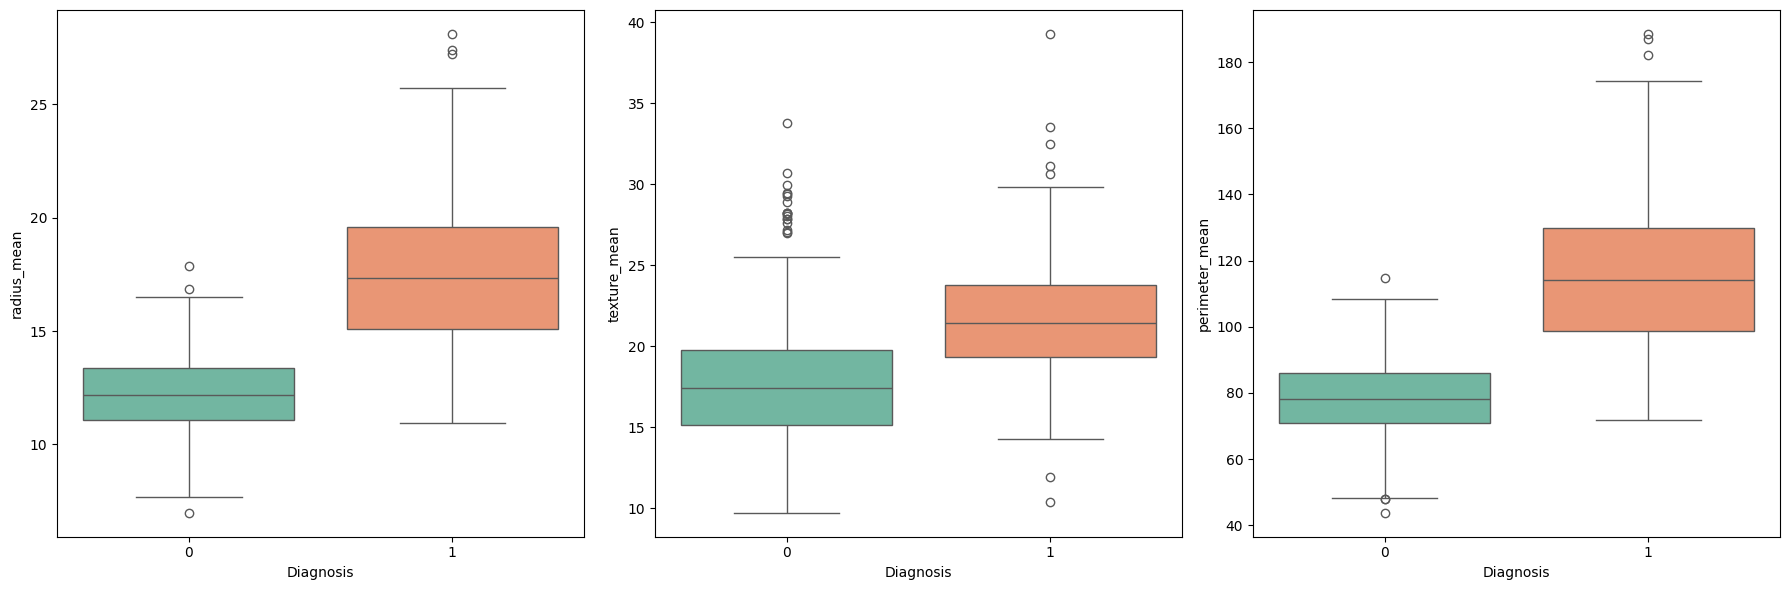

In [24]:
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean']
fig, axes = plt.subplots(1, len(features_to_plot), figsize=(18, 6))

for i, feature in enumerate(features_to_plot):
    sns.boxplot(x='diagnosis', y=feature, data = cancer_data, palette='Set2', ax=axes[i])
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [25]:
#Pemisahan Data (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#scaling fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nUkuran Data Training: {X_train.shape}")
print(f"Ukuran Data Testing: {X_test.shape}")


Ukuran Data Training: (455, 30)
Ukuran Data Testing: (114, 30)


# **Pelatihan Model Naive Bayes**

In [26]:
#inisialisasi model
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, Y_train)

#prediksi pada data uji
test_pred_nb = model.predict(X_test)

print("\nAkurasi Naive Bayes berhasil dilatih dan membuat prediksi.")


Akurasi Naive Bayes berhasil dilatih dan membuat prediksi.


# **Evaluasi Model**

In [20]:
#perhitungan akurasi
accuracy_nb = accuracy_score(Y_test, test_pred_nb)
cm_nb = confusion_matrix(Y_test, test_pred_nb)
report_nb = classification_report(Y_test, test_pred_nb)
print(f"\nAkurasi Naive Bayes: {accuracy_nb:4f}")

print("\nConfusion Matrix Naive Bayes:")
print(cm_nb)

print("\nClassification Report (0 = Jinak, 1 = Ganas)")
print(report_nb)


Akurasi Naive Bayes: 0.964912

Confusion Matrix Naive Bayes:
[[70  1]
 [ 3 40]]

Classification Report (0 = Jinak, 1 = Ganas)
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

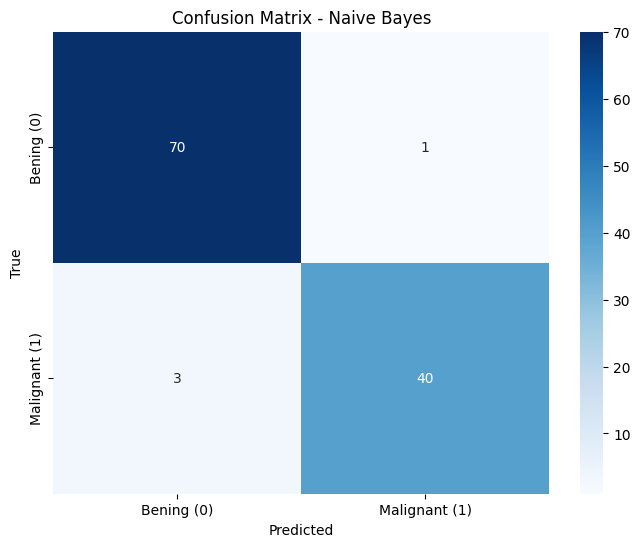

In [21]:
class_name = ['Bening (0)', 'Malignant (1)']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=class_name, yticklabels=class_name)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')